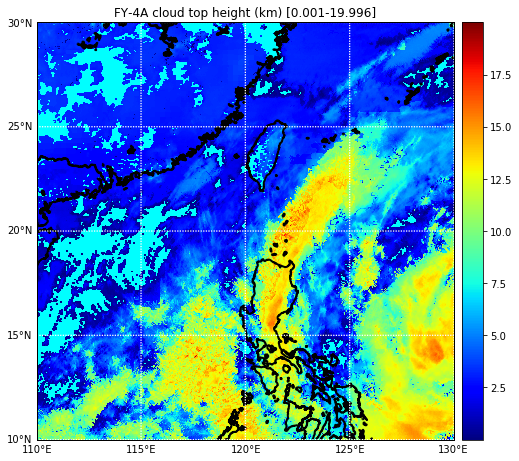

In [8]:
# To plot FY-4A CTHs by jhlee
import os
os.environ['PROJ_LIB']='/home/jhlee/anaconda3/envs/JUPYTER/share/proj'
from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np


# Read FY-4A CTHs (4 km resolution)
dir = '/storage1/jhlee/NMSC_2018/FY_4A_AGRI/'
sttime = '20200112190000'
edtime = '20200112191459'
fname = dir + 'FY4A-_AGRI--_N_DISK_1047E_L2-_CTH-_MULT_NOM_'+sttime+'_'+edtime+'_4000M_V0001.NC'
f = Dataset(fname, 'r')
cth = f.variables['CTH'][:]/1000.


# Read FY-4A lat/lon file
f = Dataset('/storage1/jhlee/NMSC_2018/FY_4A_AGRI/LatLon_4000m.nc', 'r')
lat = f.variables['Latitude']
lon = f.variables['Longitude']


# Plot FY-4A CTHs
plt.figure(figsize=(8,8))
llcrnrlat = 10#12
urcrnrlat = 30#21
llcrnrlon = 110#118
urcrnrlon = 130#125

map = Basemap(projection='cyl', llcrnrlat= llcrnrlat, urcrnrlat = urcrnrlat,\
              llcrnrlon = llcrnrlon, urcrnrlon = urcrnrlon, resolution = 'h')

x, y = map(lon, lat)

cs = map.pcolormesh(x,y,cth, shading='flat', cmap=plt.cm.jet)

map.drawcoastlines(linewidth=2)

map.drawparallels(np.arange(llcrnrlat,urcrnrlat+1,5.), labels=[True,False,False,False], color='white', linewidth=1.3)
map.drawmeridians(np.arange(llcrnrlon,urcrnrlon+1,5.), labels=[False,False,False,True], color='white', linewidth=1.3)
map.drawmapboundary(fill_color='aqua') 

cb = map.colorbar(cs, "right")


# show result plot
minval = np.min(cth)
maxval = np.max(cth)
plt.title("FY-4A cloud top height (km) [%5.3f-%6.3f]" %(minval,maxval)) 
plt.savefig('../plots/FY4A_CTHs_'+sttime+'.png', dpi=300)
plt.show()